#



# Analyzing Causes of Death Statistics in Germany

## Introduction
This computational narrative explores the causes of death statistics in Germany from 2013 to 2022. The dataset provides detailed information on deaths in Germany, categorized by various factors such as causes of death, sex, and age groups. It includes data on infectious diseases, neoplasms, diseases of the circulatory system, respiratory diseases, external causes of morbidity and mortality, and more.

### Dataset Description
The dataset, "Deaths: Germany, years, causes of death, sex, age groups" (code 23211 – 0004), is sourced from the "Causes of death statistics" provided by Genesis Destatis, an online resource for statistical data in Germany. It offers insights into mortality patterns within different demographic segments, providing valuable information for public health research and policymaking.

### Motivation
Understanding mortality patterns is crucial for public health initiatives and policymaking. By analyzing this dataset, we aim to identify trends, assess the impact of different causes of death, and inform preventive measures to improve population health. This dataset is particularly interesting as it sheds light on the major causes of death in Germany, allowing us to develop targeted interventions based on trends and specific population groups.

### Possible Questions
1. Which were the top 5 leading causes of death in each year?
2. What was the leading cause of death in each year for males and females?
3. How is the total number of deaths increased or decreased throughout the decade?
4. Which age groups were the most vulnerable in each year?
5. What was the overall trend in transport accident fatalities among males and females from 2013 to 2022?
6. What were the total number of deaths by gender in the last year 2022?

### Data Source
[Genesis Destatis - Causes of Death Statistics](https://www-genesis.destatis.de/genesis//online?operation=table&code=23211-0004&bypass=true&levelindex=1&levelid=1714580742716#abreadcrumb)


# Let's Start!

### Import necessary libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from read_data import read_csv
from combine_columns import combine_columns
pd.set_option('display.max_colwidth', None)

# Read_data Helper

## Purpose
The provided code defines a function `read_csv()` which reads a CSV file containing Germany's deaths statistics and preprocesses the data.

## Function Description
- The `read_csv()` function takes no input arguments.
- It reads the CSV file located at "../data/Germany_Deaths.csv" into a DataFrame named `df`.
- It sets the index of `df` to the 'Cause of Death' column.
- It replaces "-" and "." values with 0 in the DataFrame `df`.
- It converts columns (excluding the 'Year' column) to numeric data type.
- It separates the columns into two DataFrames: `df_males` containing death statistics for males, and `df_females` containing death statistics for females.
- It renames columns in `df_females` by removing the ".1" suffix.
- It inserts the 'Year' column from `df_males` into `df_females`.

## Returns
The function returns three DataFrames:
- `df`: DataFrame containing overall death statistics.
- `df_males`: DataFrame containing death statistics for males.
- `df_females`: DataFrame containing death statistics for females.


In [2]:
# using read_csv function defined in the read_data.py to read the csv 
# read_csv returns three dataframes for overall population, males and females

df, df_males, df_females = read_csv()

# df

# Function to Plot Top Five Causes of Deaths

## Purpose
The provided function `plot_top_five_causes()` plots the top five causes of deaths in the years 2013-2022.

## Function Description
- The function takes two arguments: `df_input` (DataFrame containing data for plotting) and `message` (optional message to append to the plot title).
- It first retrieves the unique causes of death from the 'Cause of Death' column of the input DataFrame and assigns colors to them.
- Then, it plots subplots for each year from 2013 to 2022, with a 2x5 grid layout.
- For each year, it iterates over the unique causes of death and plots a bar chart for each cause, representing the total deaths.
- If it's the first iteration (i.e., the first subplot), it collects handles for the legend.
- It sets the title of each subplot as the respective year and labels the x-axis with 'Cause of Death'.
- Finally, it adds a legend to the plot, titles it with 'Cause of Death', and adjusts the layout for better visualization.

## Returns
The function does not return any value. It directly displays the plot.


In [3]:
# Function to Plot Top Five Causes of Deaths

def plot_top_five_causes(df_input, message=" - Overall"):
    """
    Visualizes the top five causes of deaths in the years 2013-2022.

    Parameters:
    - df_input (DataFrame): DataFrame containing the data for plotting.
    - message (str, optional): A string message to append to the plot title. Default is " - Overall".

    Returns:
    None
    """
    # Getting unique causes and assigning colors
    unique_causes = df_input['Cause of Death'].unique()
    colors = plt.cm.tab10.colors[:len(unique_causes)]

    # Plotting
    fig, axs = plt.subplots(2, 5, figsize=(22, 16), sharey=True)

    # List to store handles for legend
    handles = []

    # Iterating over each year from 2013 to 2022
    for i, year in enumerate(range(2013, 2023)):
        ax = axs[i // 5, i % 5]  # Selecting the appropriate subplot
        year_data = df_input[df_input['Year'] == year]  # Filtering data for the current year
        unique_causes = year_data['Cause of Death'].unique()  # Getting unique causes for the current year

        # Iterating over unique causes for the current year
        for j, cause in enumerate(unique_causes):
            cause_data = year_data[year_data['Cause of Death'] == cause]  # Filtering data for the current cause
            bars = ax.bar(j, cause_data['Total Deaths'], color=colors[j])  # Plotting bar chart
            if i == 0:  # Collecting handles for legend only for the first subplot
                handles.append(bars)

        # Setting title, x-axis labels, and ticks for the subplot
        ax.set_title(year)
        ax.set_xticks(range(len(unique_causes)))
        ax.set_xticklabels(unique_causes, rotation=90)
        ax.set_xlabel('Cause of Death')

    # Adding title to the entire plot
    plt.suptitle('Causes of Death by Year' + message, fontsize=16)

    # Creating legend and adjusting layout
    legend_labels = unique_causes
    plt.legend(handles, legend_labels, title='Cause of Death', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Displaying the plot
    plt.show()


## 1. Which were the top 5 leading causes of death in each year?

To answer this question, we first calculate the total number of deaths for each cause across all age groups for each year. Then, we group the data by year and select the top 5 causes with the highest total deaths. Afterward, we drop the 'Year' column from the resulting DataFrame for visualization purposes. Finally, we plot the top five causes of death for each year using the function `plot_top_five_causes`.


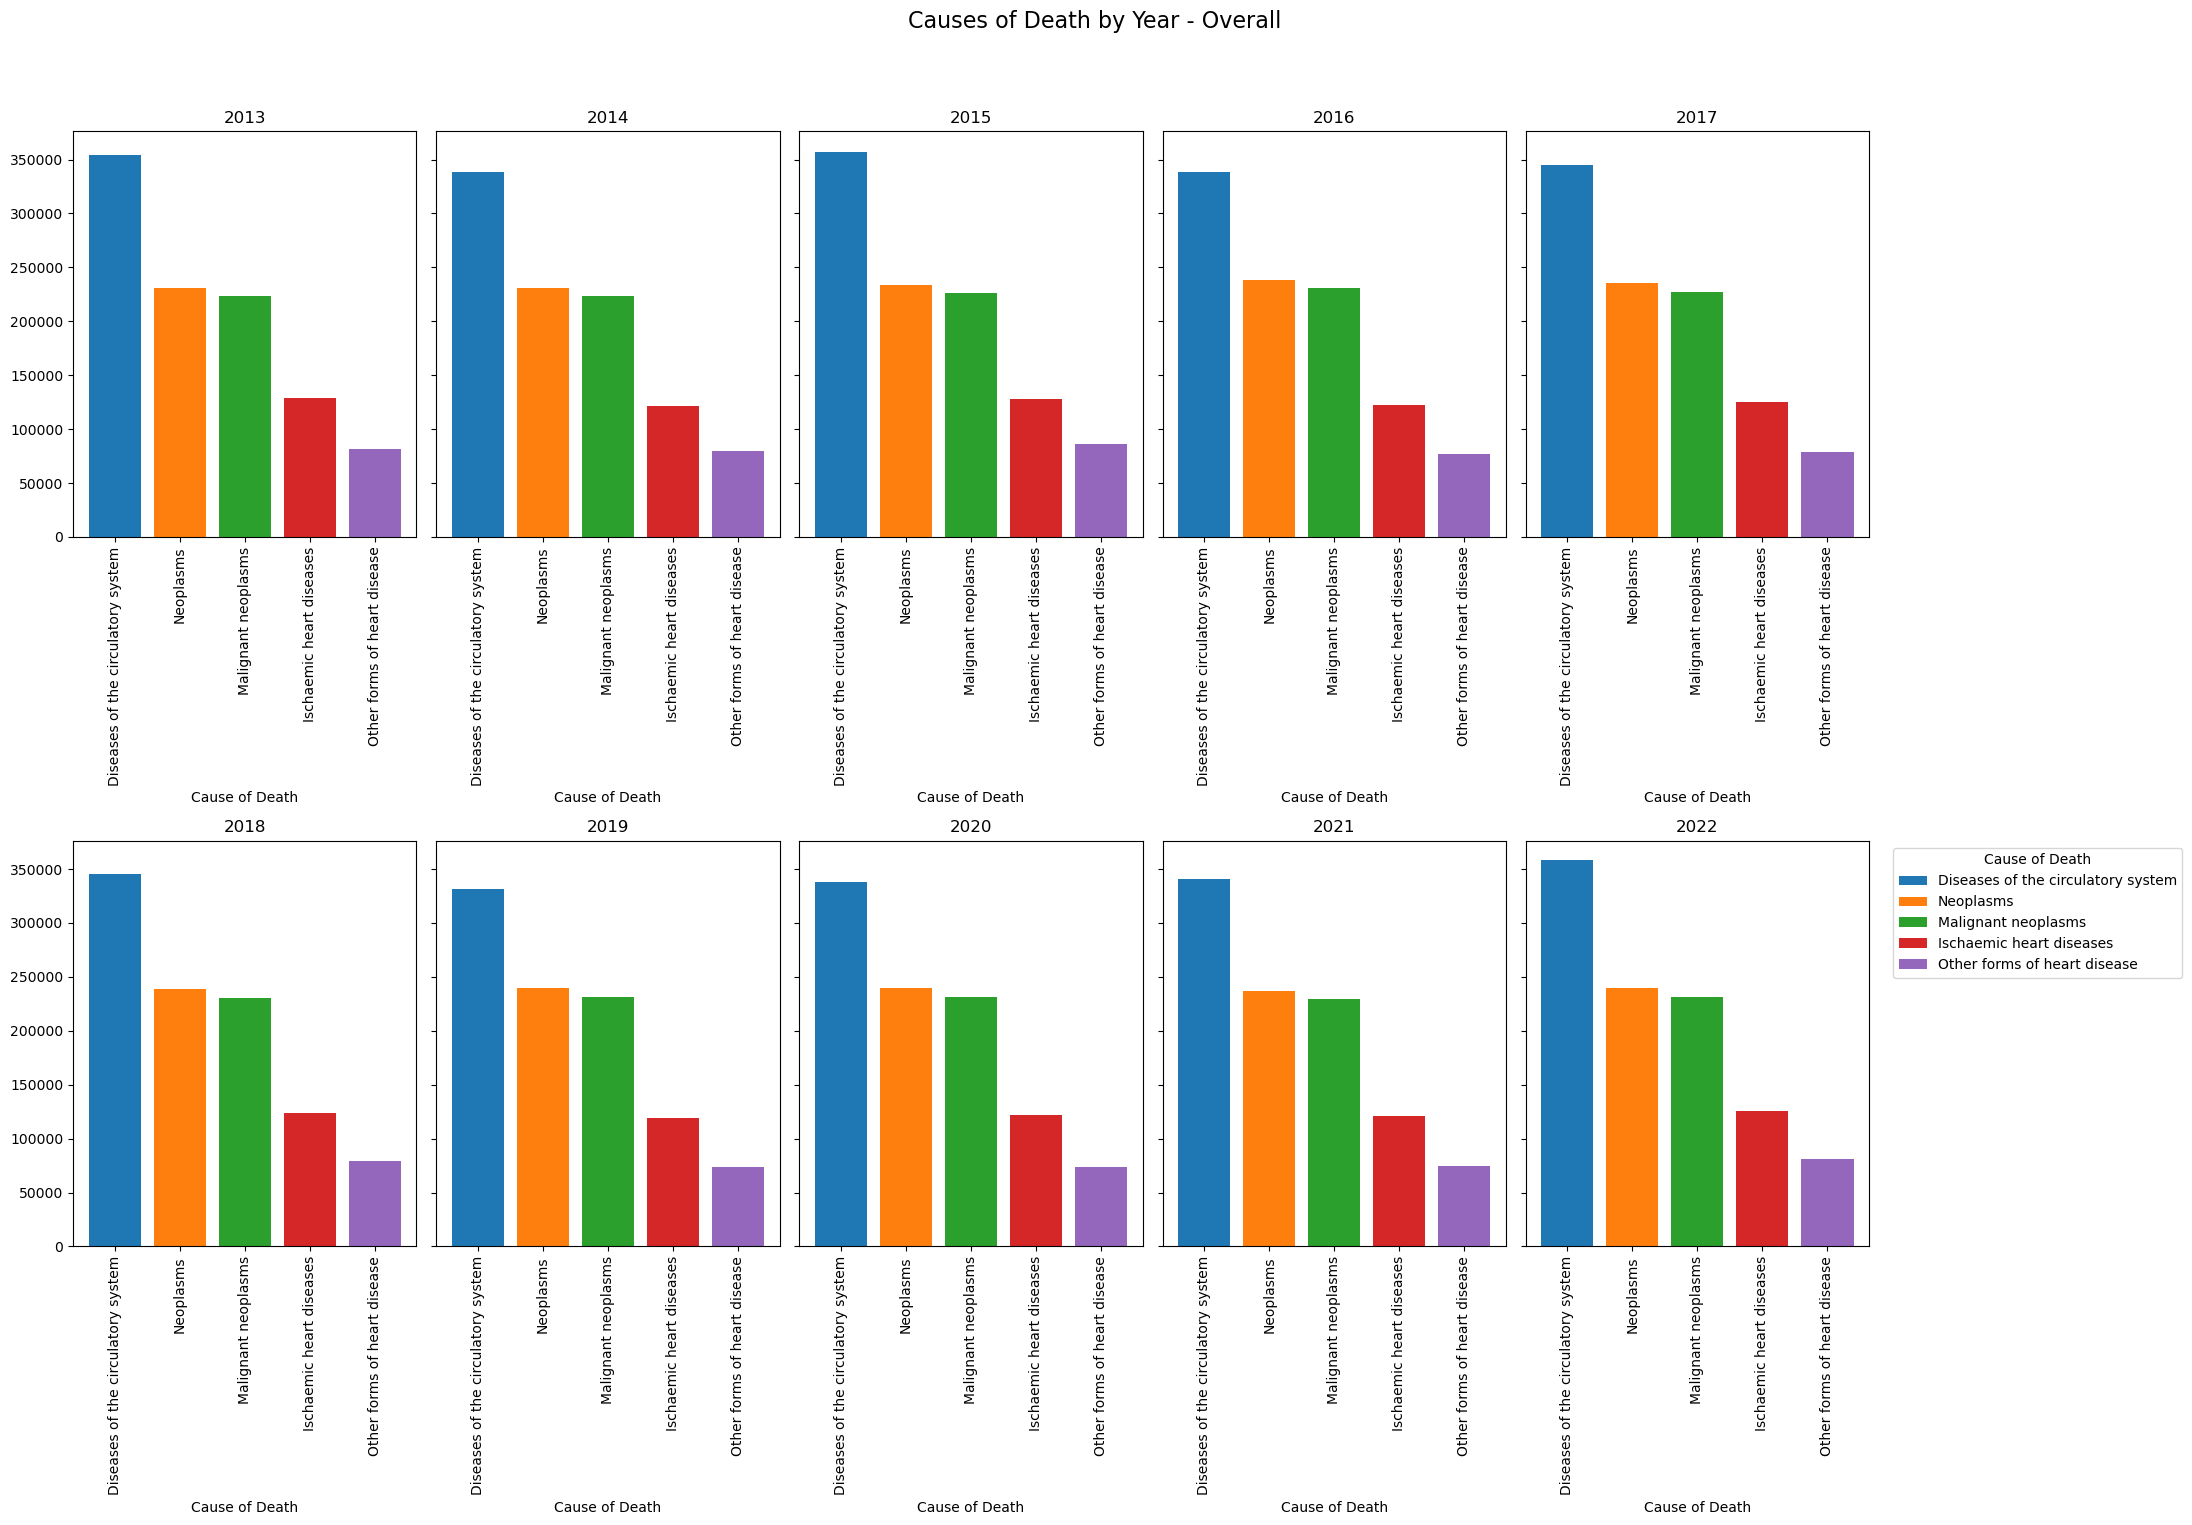

In [4]:
# Calculate the total number of deaths for each cause across all age groups for each year
df['Total Deaths'] = df.iloc[:, 1:].sum(axis=1)

# Group the data by year and select the top 5 causes with the highest total deaths
top_5_causes_of_death = df.groupby('Year').apply(lambda x: x.nlargest(5, 'Total Deaths'))

# Drop the 'Year' column from the resulting DataFrame for visualization purposes
top_5_causes_of_death.drop('Year', axis=1, inplace=True)

# Reset the index and select only 'Year', 'Cause of Death', and 'Total Deaths' columns
df_updated = top_5_causes_of_death.reset_index()[['Year', 'Cause of Death', 'Total Deaths']]

# Plot the top five causes of death for each year using the function plot_top_five_causes
plot_top_five_causes(df_updated)


# 2.a. What was the leading cause of death in each year for females?

To find the leading cause of death for males and females in each year, we followed these steps:

1. **Calculate Total Deaths**: We computed the total number of deaths for each cause across all age groups for females.

2. **Group and Select Top Causes**: Next, we grouped the data by year and selected the top 5 causes with the highest total deaths for females.

3. **Data Preparation**: We dropped the 'Year' column from the resulting DataFrame for visualization purposes and reset the index.

4. **Visualization**: Finally, we plotted the top five causes of death for each year for females using the `plot_top_five_causes` function.

This process was also repeated for males to determine the leading causes of death for both genders.


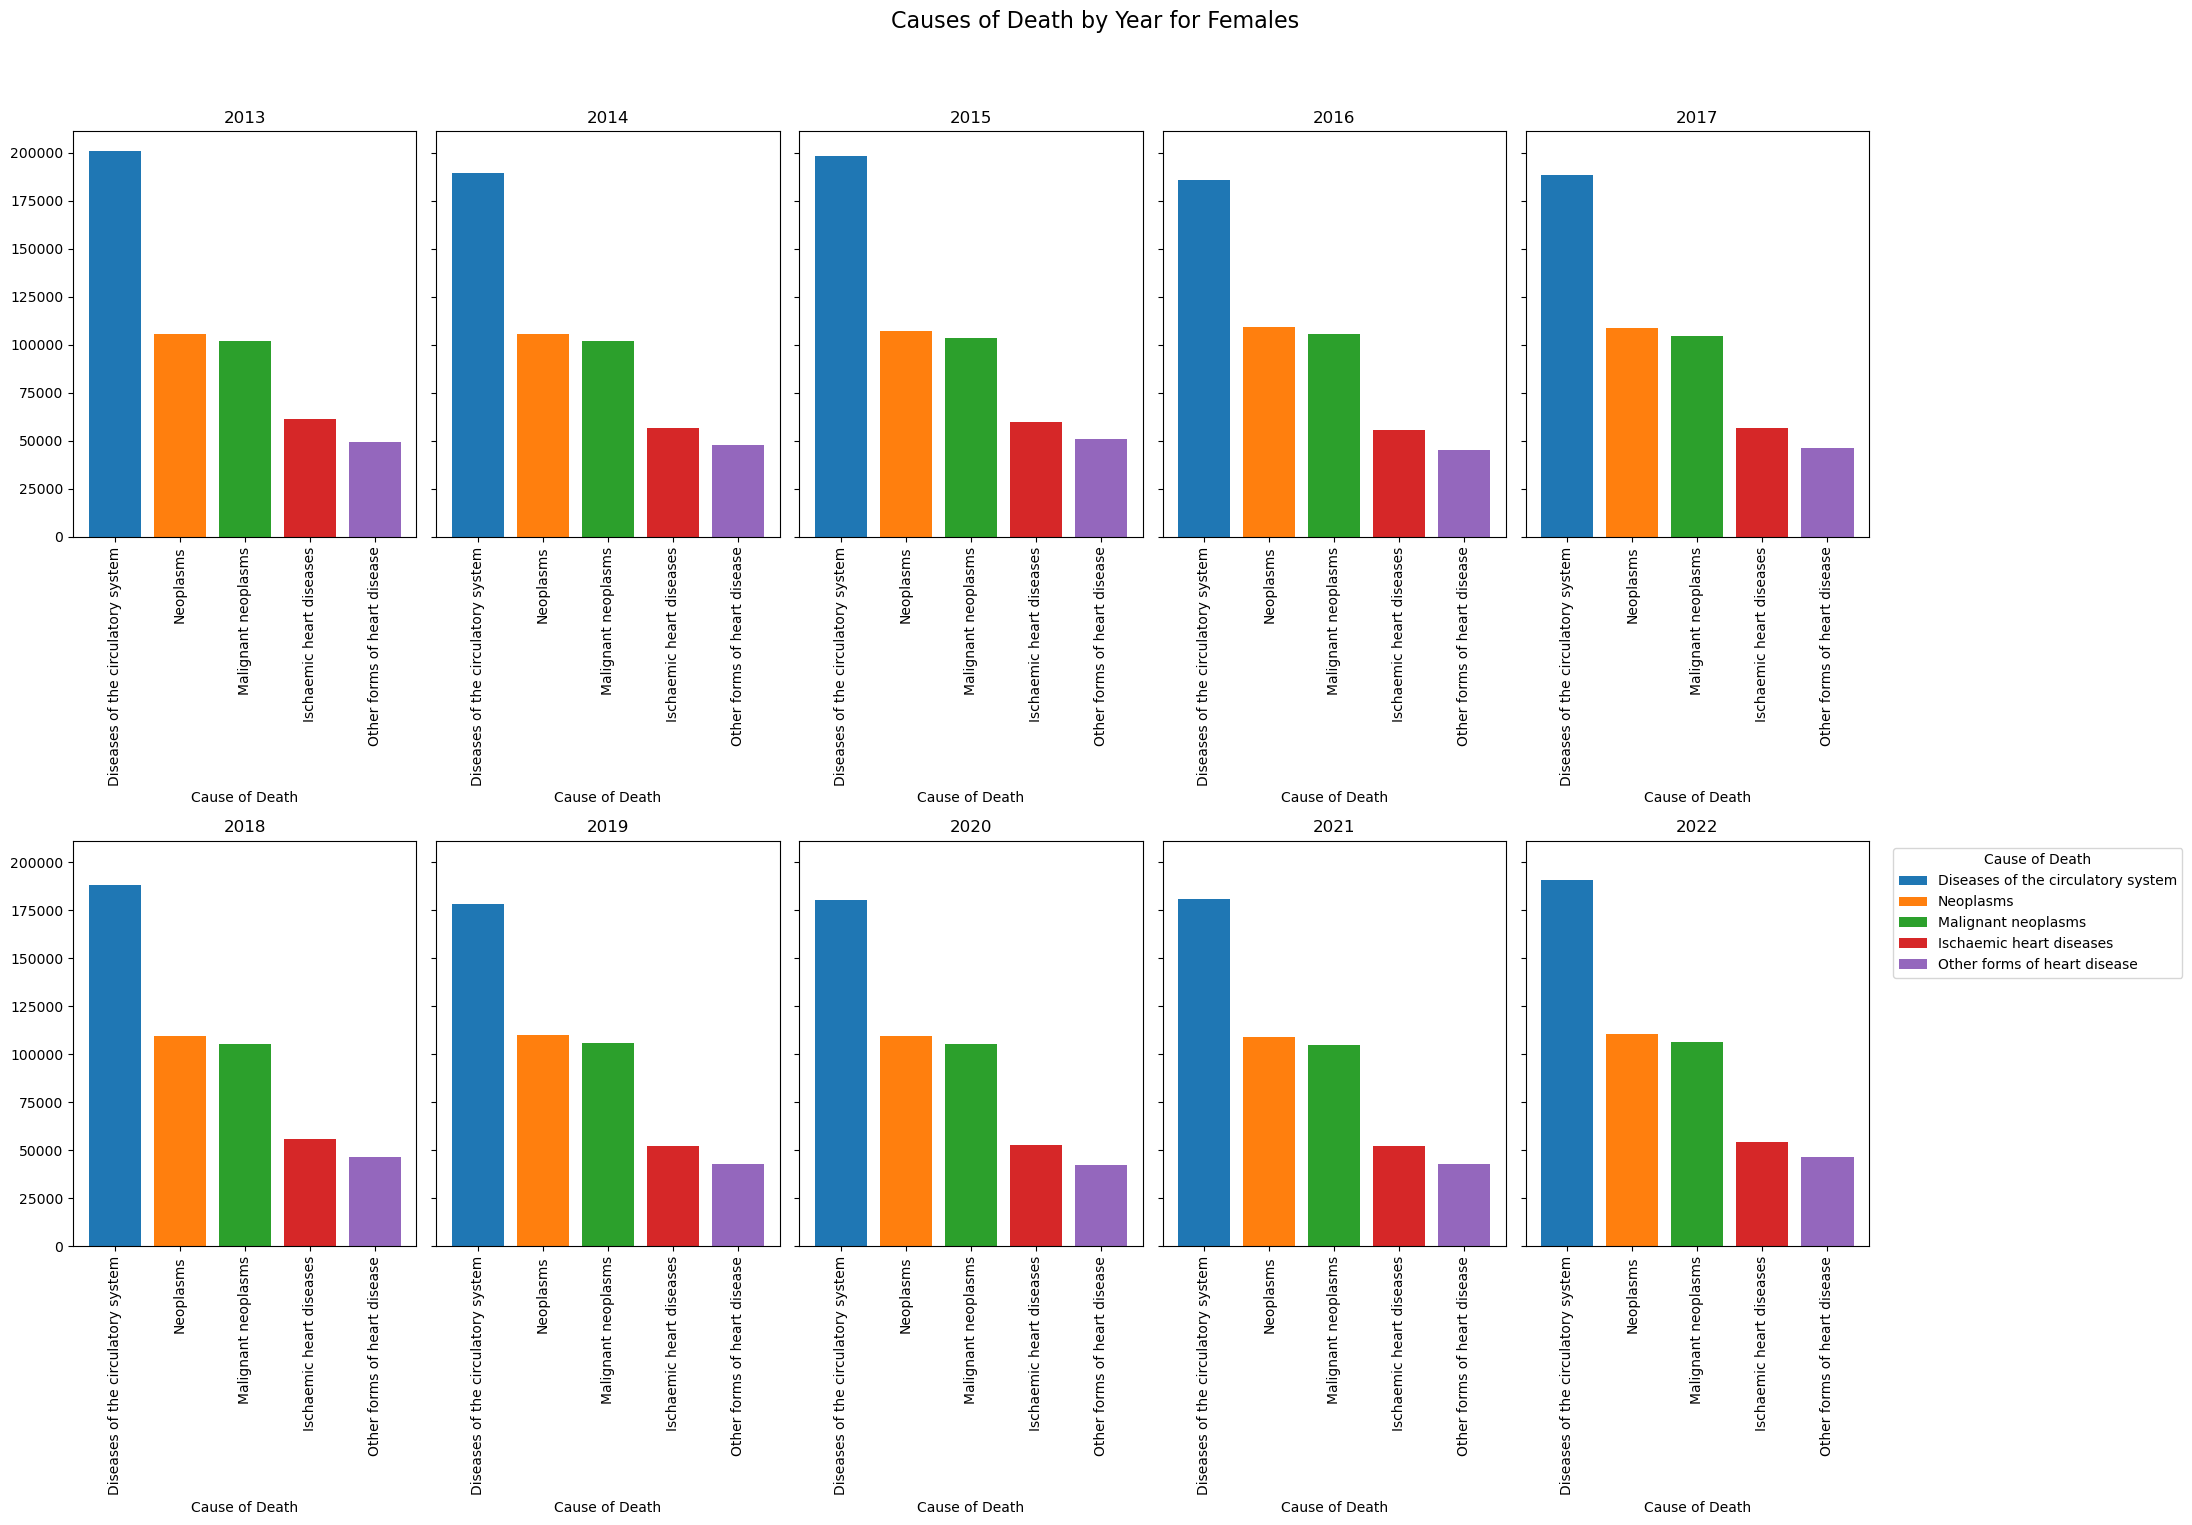

In [5]:
# Calculate the total deaths for each cause across all age groups for females
df_females['Total Deaths'] = df_females.iloc[:, 1:].sum(axis=1)

# Group the data by year and select the top 5 causes with the highest total deaths
top_5_causes_of_death_females = df_females.groupby('Year').apply(lambda x: x.nlargest(5, 'Total Deaths'))

# Drop the 'Year' column from the resulting DataFrame for visualization purposes
top_5_causes_of_death_females.drop('Year', axis=1, inplace=True)

# Reset the index and select only the 'Year', 'Cause of Death', and 'Total Deaths' columns
df_females_updated = top_5_causes_of_death_females.reset_index()[['Year', 'Cause of Death', 'Total Deaths']]

# Plot the top five causes of death for each year for females
plot_top_five_causes(df_females_updated, " for Females")

## 2.b. What was the leading cause of death in each year for males?

To answer this question for males, we first calculate the total number of deaths for each cause across all age groups for each year in the DataFrame `df_males`. Then, we group the data by year and select the top 5 causes with the highest total deaths. Afterward, we drop the 'Year' column from the resulting DataFrame for visualization purposes. Finally, we plot the top five causes of death for each year for males using the function `plot_top_five_causes`.


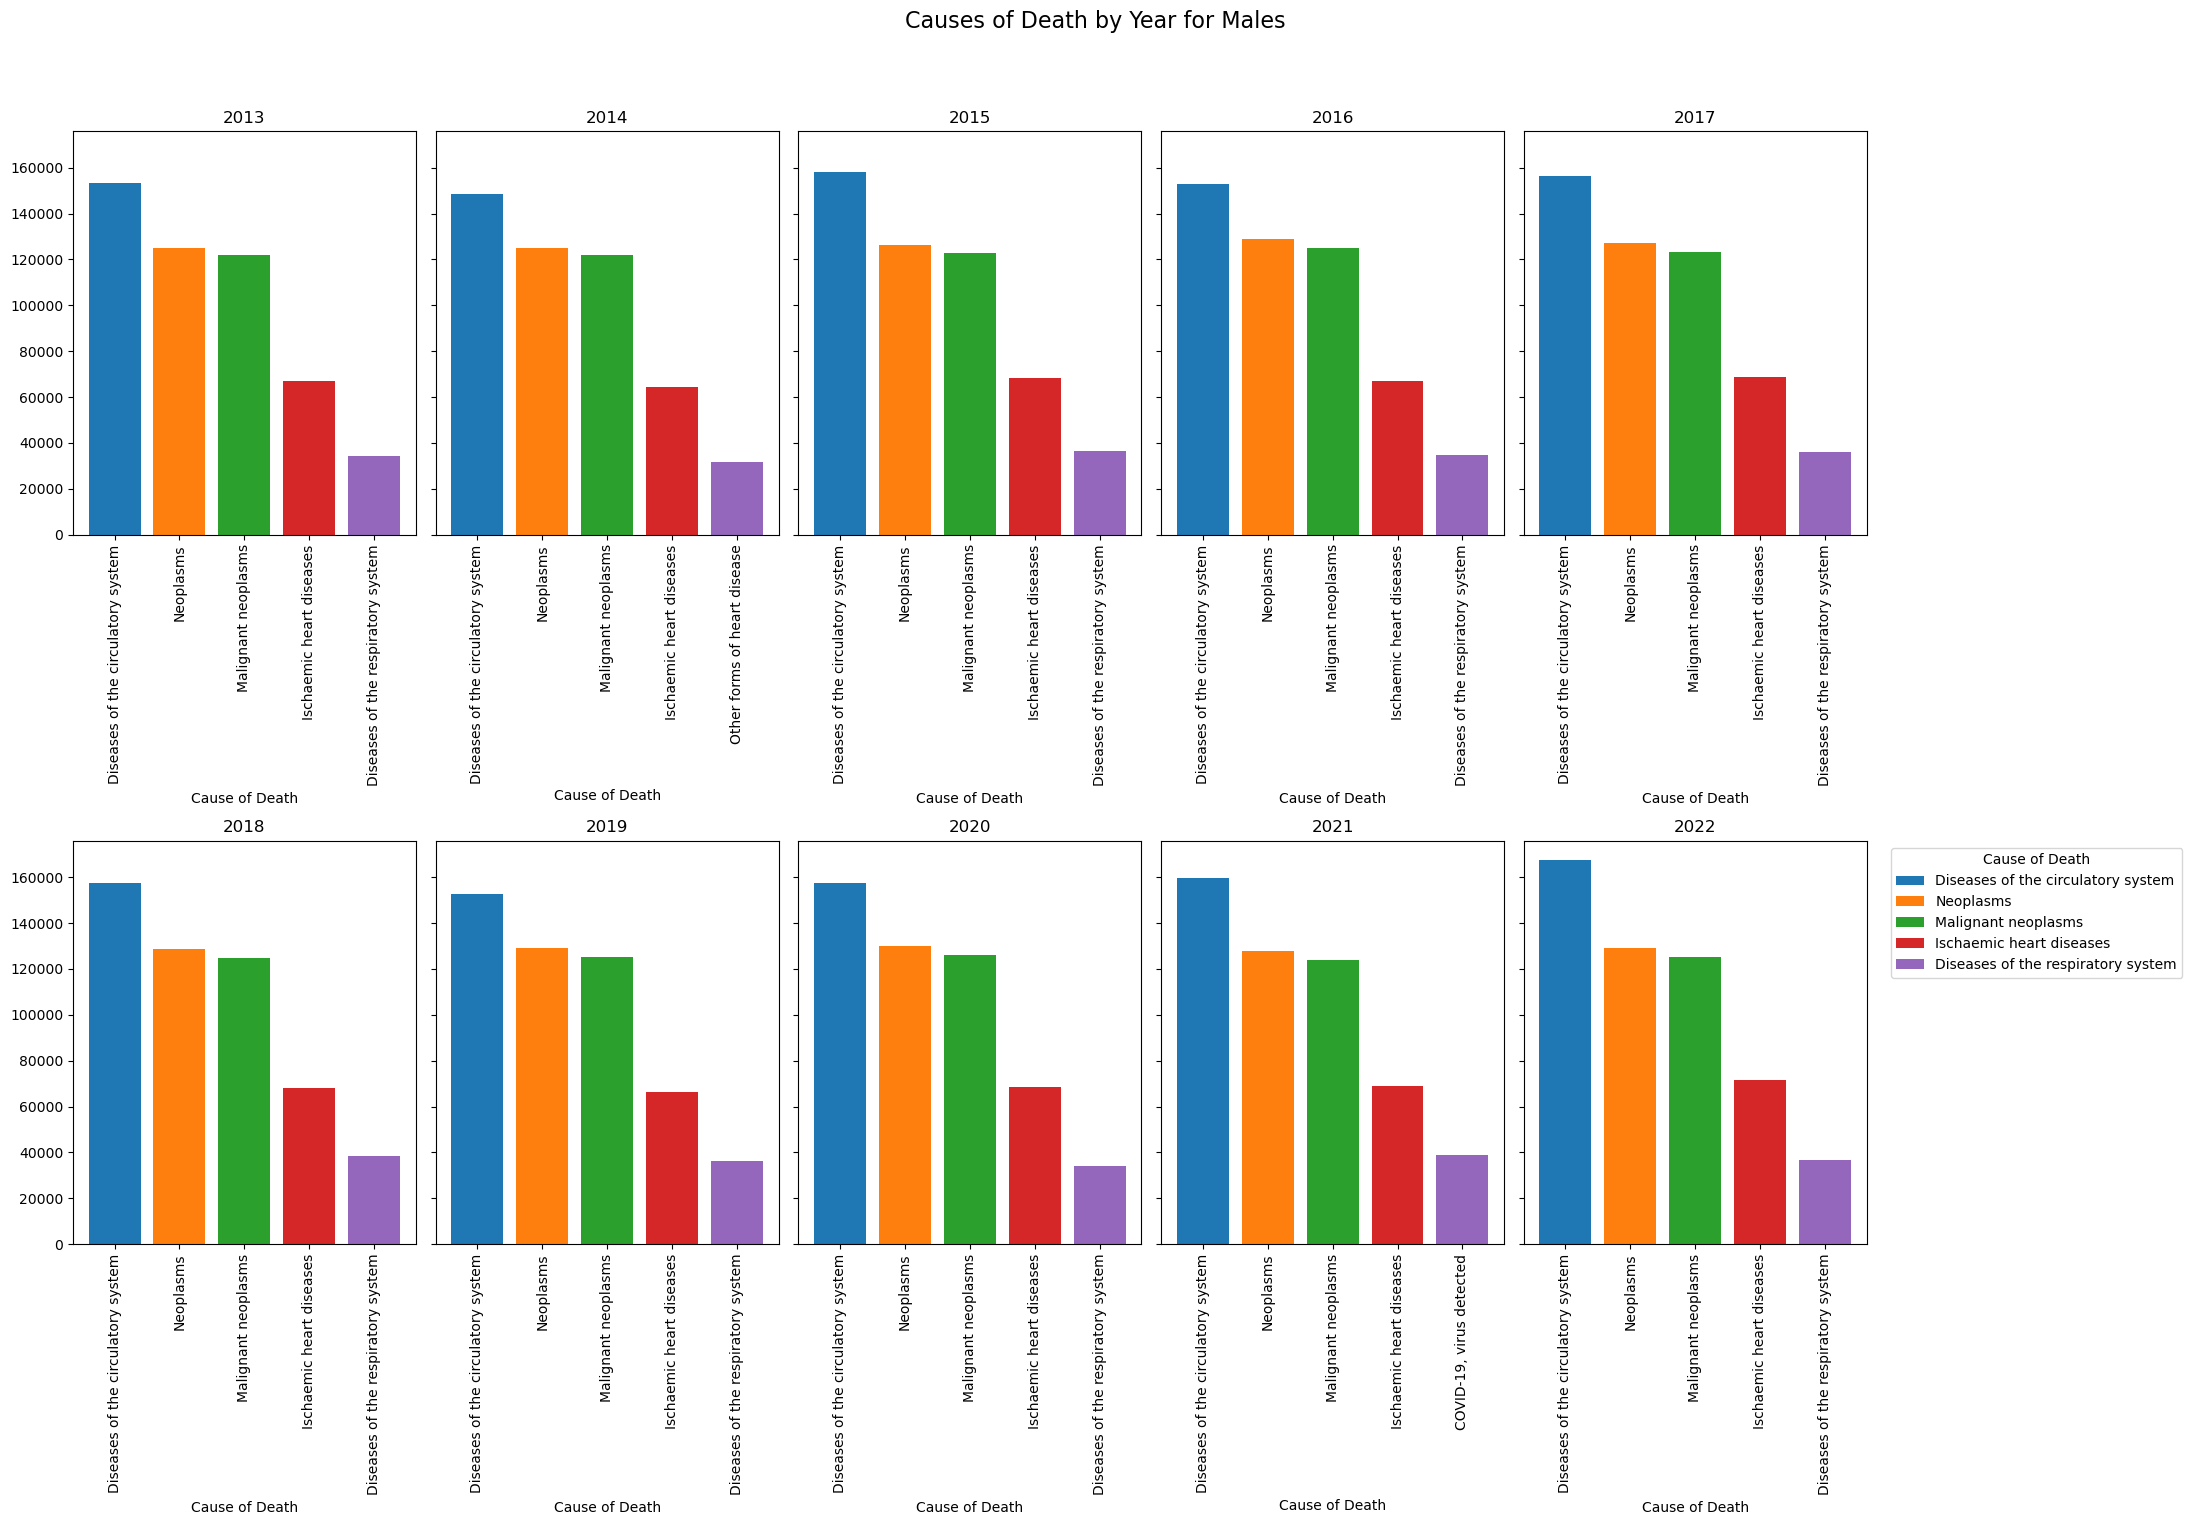

In [6]:
# Calculate the total deaths for each cause across all age groups for males
df_males['Total Deaths'] = df_males.iloc[:, 1:].sum(axis=1)

# Group the data by year and select the top 5 causes with the highest total deaths
top_5_causes_of_death_males = df_males.groupby('Year').apply(lambda x: x.nlargest(5, 'Total Deaths'))

# Drop the 'Year' column from the resulting DataFrame for visualization purposes
top_5_causes_of_death_males.drop('Year', axis=1, inplace=True)

# Reset the index and select only the 'Year', 'Cause of Death', and 'Total Deaths' columns
df_males_updated = top_5_causes_of_death_males.reset_index()[['Year', 'Cause of Death', 'Total Deaths']]

# Plot the top five causes of death for each year for males
plot_top_five_causes(df_males_updated, " for Males")

## 3. How is the total number of deaths increased or decreased throughout the decade?

To analyze the trend in the total number of deaths throughout the decade (2013-2022), we performed the following steps:

1. **Data Cleaning**: We replaced any '-' values in the 'Total Deaths' column with '0' and converted the column to numeric datatype using `pd.to_numeric`.

2. **Grouping and Summation**: We grouped the data by year and calculated the total number of deaths for each year by summing the values in the 'Total Deaths' column.

3. **Plotting**: We visualized the trend in total deaths over the years using a line plot. Each point on the plot represents a year, and the corresponding total number of deaths is plotted on the y-axis.

The resulting plot provides insights into how the total number of deaths has changed over the years, indicating whether it has increased, decreased, or remained relatively stable throughout the decade.


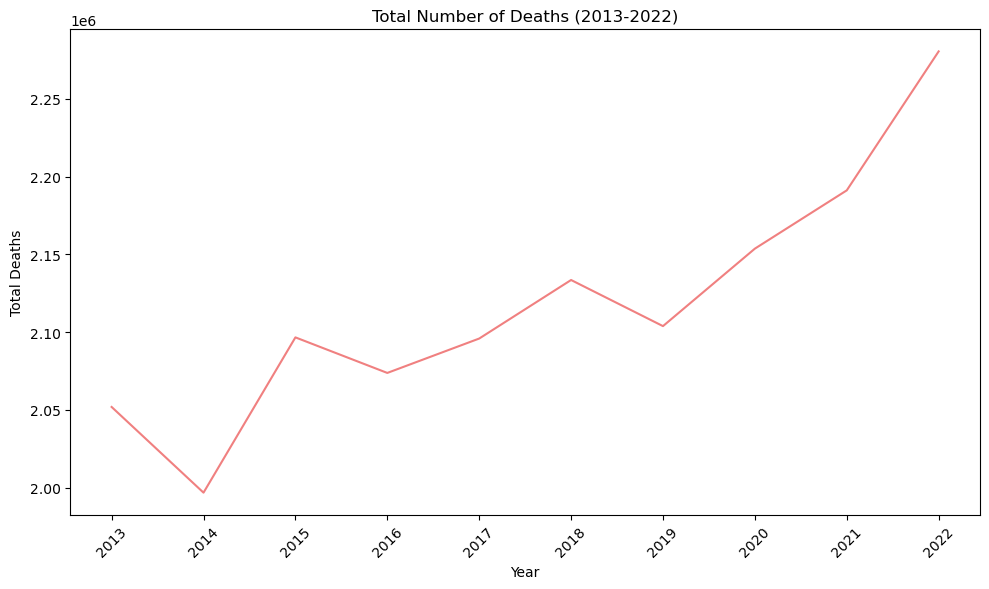

In [7]:
# Remove the '-' from the 'Total Deaths' column and convert it to numeric
df['Total Deaths'] = pd.to_numeric(df['Total Deaths'].replace('-', '0'))

# Group the data by year and sum the total deaths
total_deaths_by_year = df.groupby('Year')['Total Deaths'].sum()

# Plot the data
plt.figure(figsize=(10, 6))  # Set the figure size
total_deaths_by_year.plot(kind='line', color='lightcoral')  # Plot a line graph with total deaths by year
plt.title('Total Number of Deaths (2013-2022)')  # Set the title of the plot
plt.xlabel('Year')  # Set the label for the x-axis
plt.ylabel('Total Deaths')  # Set the label for the y-axis
plt.xticks(total_deaths_by_year.index, rotation=45)  # Set the ticks for the x-axis with rotation for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot


## 4. Which age groups were the most vulnerable in each year?

To answer this question, we need to combine the age groups that are split into separate columns, such as "under 1 year" and "under 1 year.1". The provided code achieves this by iterating over pairs of age group columns, summing their values, and dropping the duplicate columns.

1. **List of Age Group Columns:** Defines the column names representing different age groups.

2. **Combine Age Groups:** I have used the function combine_columns defined in another python file, the code creates a copy of the DataFrame (`df_combined`) and iterates over pairs of age group columns. For each pair, it adds the values of the corresponding columns and stores the result in the first column. After combining the values, it drops the duplicate columns ending with ".1".

3. **Result:** The resulting DataFrame (`df_combined`) contains combined age group columns, facilitating the analysis of vulnerable age groups in each year.

We can use the `df_combined` DataFrame for further analysis, where age groups are combined.


In [8]:
# Combine age group columns to simplify analysis
df_combined = combine_columns(df)

# Drop the 'Total Deaths' column as it will be recalculated
df_combined.drop('Total Deaths', axis=1, inplace=True)

# Calculate the total number of deaths for each year
df_combined['Total Deaths'] = df.iloc[:, 1:].sum(axis=1)

# Group the data by year
grouped_by_year = df_combined.groupby('Year')

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Year', 'Most Vulnerable Age Group', 'Top 3 Causes of Death'])

# Iterate over each group (year)
for year, data in grouped_by_year:
    # Find the age group(s) with the highest number of deaths
    max_deaths_age_group = data.iloc[:, :-1].sum(axis=0).idxmax()

    # Get the top 3 causes of death for the most vulnerable age group(s)
    top_3_causes = data.nlargest(3, max_deaths_age_group)[[max_deaths_age_group]]

    # Compute the total deaths for the most vulnerable age group
    total_deaths = data.iloc[:, :-1].sum(axis=0)[max_deaths_age_group]

    # Append the results to the results DataFrame
    results_df = results_df.append({'Year': year, 
                                    'Most Vulnerable Age Group': max_deaths_age_group, 
                                    'Top 3 Causes of Death': ', '.join(top_3_causes.index.tolist()),
                                    'Total Deaths': total_deaths}, ignore_index=True)

# Convert 'Total Deaths' to integer type for better representation
results_df['Total Deaths'] = results_df['Total Deaths'].astype(int)

# Display the results DataFrame
results_df


,Year,Most Vulnerable Age Group,Top 3 Causes of Death,Total Deaths
0,2013,85 years and over,"Diseases of the circulatory system, Ischaemic heart diseases, Other forms of heart disease",658672
1,2014,85 years and over,"Diseases of the circulatory system, Ischaemic heart diseases, Other forms of heart disease",648297
2,2015,85 years and over,"Diseases of the circulatory system, Ischaemic heart diseases, Other forms of heart disease",700791
3,2016,85 years and over,"Diseases of the circulatory system, Ischaemic heart diseases, Neoplasms",689710
4,2017,85 years and over,"Diseases of the circulatory system, Ischaemic heart diseases, Neoplasms",710167
5,2018,85 years and over,"Diseases of the circulatory system, Ischaemic heart diseases, Neoplasms",721293
6,2019,85 years and over,"Diseases of the circulatory system, Ischaemic heart diseases, Neoplasms",710490
7,2020,85 years and over,"Diseases of the circulatory system, Ischaemic heart diseases, Neoplasms",752226
8,2021,85 years and over,"Diseases of the circulatory system, Ischaemic heart diseases, Neoplasms",771878
9,2022,85 years and over,"Diseases of the circulatory system, Ischaemic heart diseases, Neoplasms",836410


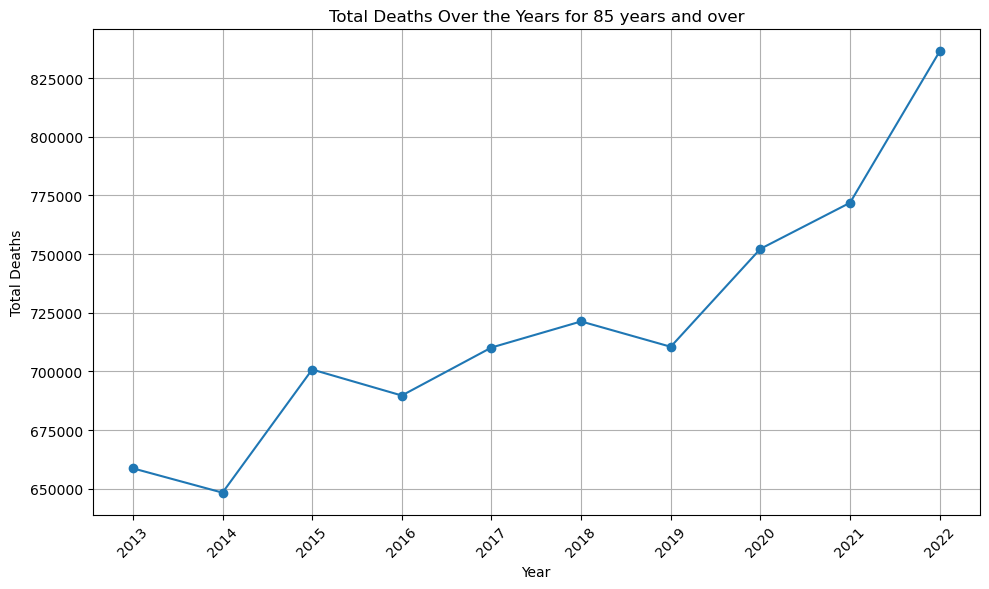

In [9]:
# Plotting the total deaths over the years for the most vulnerable age group

# Set up the figure size
plt.figure(figsize=(10, 6))

# Plot the data as a line plot with markers
plt.plot(results_df['Year'], results_df['Total Deaths'], marker='o', linestyle='-')

# Set the title of the plot
plt.title('Total Deaths Over the Years for ' + str(max_deaths_age_group))

# Set the labels for the x and y axes
plt.xlabel('Year')
plt.ylabel('Total Deaths')

# Convert 'Year' to integer type for better representation on the x-axis
results_df['Year'] = results_df['Year'].astype(int)

# Set the ticks for the x-axis and rotate them for better readability
plt.xticks(results_df['Year'], rotation=45)

# Enable grid for better visualization
plt.grid(True)

# Ensure tight layout to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()


## 5. What were the total number of deaths by gender in the last year 2022?

In this analysis, we aim to explore the total number of deaths by gender in the last year, 2022. We begin by calculating the total deaths for males and females separately from the provided dataset. Using the data obtained, we create visualizations to represent the distribution of total deaths by gender.

### Bar Chart:
We visualize the total number of deaths for males and females in 2022 using a bar chart. The x-axis represents the gender categories ('Male' and 'Female'), while the y-axis represents the total number of deaths. The blue bars indicate male deaths, and the pink bars represent female deaths.

### Pie Chart:
Another visualization is presented in the form of a pie chart, which illustrates the distribution of total deaths by gender in 2022. Each segment of the pie chart represents the proportion of total deaths for males and females. The percentages displayed on the chart denote the relative contribution of each gender to the total number of deaths.

These visualizations provide a clear understanding of the gender-wise distribution of deaths in the specified year, aiding in demographic analysis and healthcare resource allocation.


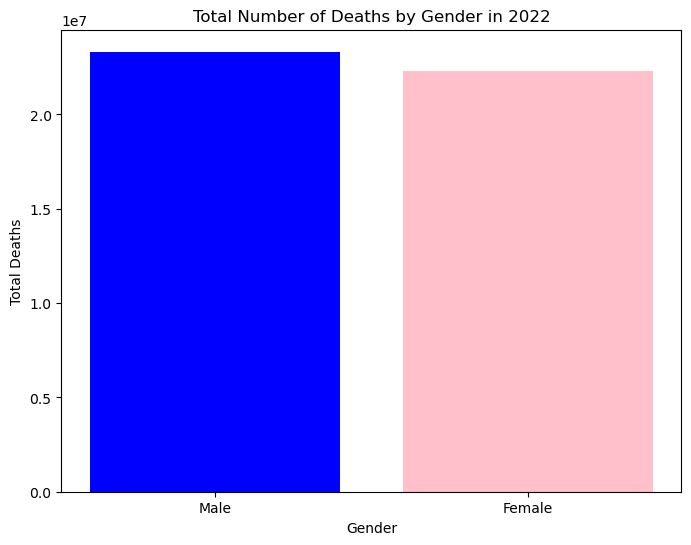

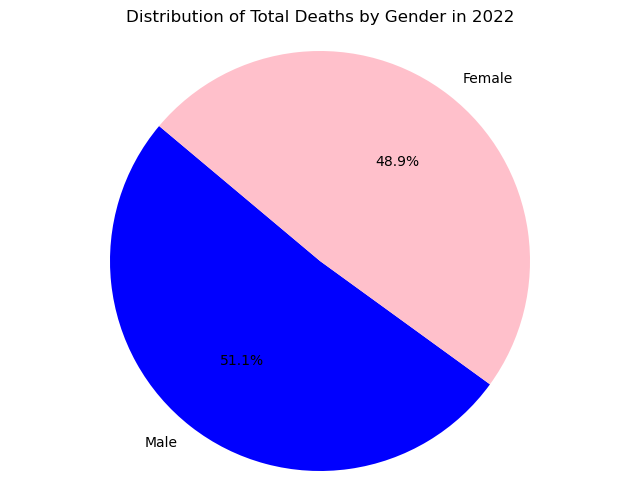

In [10]:
# Compute the total number of deaths by gender in the last year 2022

# Calculate the total deaths for males and females separately
df_males['Total Deaths'] = df_males.apply(pd.to_numeric, errors='coerce').sum(axis=1)
df_females['Total Deaths'] = df_females.apply(pd.to_numeric, errors='coerce').sum(axis=1)

# Calculate the sum of total deaths for males and females
total_deaths_male = df_males['Total Deaths'].sum()
total_deaths_female = df_females['Total Deaths'].sum()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Male', 'Female'], [total_deaths_male, total_deaths_female], color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Total Deaths')
plt.title('Total Number of Deaths by Gender in 2022')
plt.show()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie([total_deaths_male, total_deaths_female], labels=['Male', 'Female'], colors=['blue', 'pink'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Deaths by Gender in 2022')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


# Conclusion

The analysis of Germany's deaths statistics from 2013 to 2022 provides valuable insights into mortality trends, leading causes of death, age group vulnerabilities, and gender disparities. Leveraging computational techniques and visualizations, we have addressed several questions to better understand mortality patterns and inform public health strategies.


## Key Findings
1. **Leading Causes of Death**: Through the analysis, we identified the top five leading causes of death each year from 2013 to 2022. This information helps prioritize disease prevention and healthcare resource allocation.

2. **Gender Disparities**: We examined the leading causes of death for males and females separately, highlighting gender-specific health concerns and mortality patterns.

3. **Age Group Vulnerabilities**: By combining age group columns and analyzing total deaths by age group, we identified the most vulnerable age groups each year. This insight is essential for developing age-specific healthcare interventions.

4. **Total Deaths Trend**: The total number of deaths fluctuated over the decade, indicating dynamic shifts in mortality patterns influenced by various factors such as demographic changes, disease outbreaks, and healthcare advancements.

5. **Gender-specific Mortality**: In 2022, we observed gender disparities in mortality, with a higher total number of deaths among males compared to females. Visualizations such as bar charts and pie charts effectively communicated these gender-specific trends.

## Implications
The findings from this analysis have several implications for public health policy and practice:
- **Targeted Interventions**: Policymakers can use the insights to develop targeted interventions addressing specific causes of death and vulnerable demographics.
- **Healthcare Resource Allocation**: Understanding mortality trends facilitates efficient allocation of healthcare resources, ensuring adequate support for the most affected populations.
- **Preventive Healthcare**: By identifying leading causes of death, healthcare systems can prioritize preventive measures, screenings, and treatment strategies to mitigate disease burden.

## Future Directions
- **Long-term Trend Analysis**: Further analysis could explore long-term trends beyond the provided dataset to identify emerging health issues and evaluate the effectiveness of interventions over time.
- **Geospatial Analysis**: Geographic variations in mortality rates could provide additional insights into regional disparities and inform targeted regional healthcare policies.
- **Multivariate Analysis**: Integrating additional socio-economic and demographic factors could enhance understanding of complex interactions influencing mortality patterns.

In conclusion, the analysis of Germany's deaths statistics offers valuable insights into mortality trends and informs evidence-based decision-making in public health. By leveraging computational techniques and data-driven approaches, we can continue to refine our understanding of mortality dynamics and work towards improving population health outcomes.
